<a href="https://colab.research.google.com/github/kridtapon/Cluster-Map-S-P-500-Tech-Stock/blob/main/Cluster_Map_S%26P_500_Tech_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf

# Download adjusted closing prices from Yahoo Finance
start_date = '2024-01-01'
end_date = '2024-12-31'
tech_stock = ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'PLTR', 'TSLA', 'GOOGL', 'AMZN', 'META', 'ORCL', 'DELL', 'SMCI', 'INTC', 'AMD', 'CSCO', 'IBM', 'CRM', 'ADBE', 'PYPL', 'TXN', 'SPY']

stock_data = yf.download(tech_stock, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  21 of 21 completed


In [33]:
stock_data

Ticker,AAPL,ADBE,AMD,AMZN,AVGO,CRM,CSCO,DELL,GOOGL,IBM,...,META,MSFT,NVDA,ORCL,PLTR,PYPL,SMCI,SPY,TSLA,TXN
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,184.734970,580.070007,138.580002,149.929993,107.095505,254.707352,48.917706,73.650795,137.670929,157.093857,...,344.972229,368.854095,48.154346,102.802834,16.580000,61.459999,28.545000,466.663940,248.419998,164.571152
2024-01-03,183.351761,571.789978,135.320007,148.470001,104.451118,250.441177,49.298351,75.433220,138.418213,155.732056,...,343.159149,368.585571,47.555515,101.222153,16.090000,58.630001,28.063999,462.852844,238.449997,162.120972
2024-01-04,181.023163,567.049988,136.009995,144.570007,103.506836,249.844513,48.878670,74.812828,135.897354,156.471313,...,345.799072,365.940002,47.984398,101.350586,16.250000,58.450001,28.879999,461.361938,237.929993,159.913849
2024-01-05,180.296722,564.599976,138.580002,145.240005,103.533478,249.725174,48.888428,74.684807,135.239746,154.817719,...,350.610718,365.751068,49.083080,101.488899,15.980000,60.119999,29.212999,461.993866,237.490005,160.526413
2024-01-08,184.655365,580.549988,146.179993,149.100006,106.056488,259.421021,49.249546,78.151192,138.338501,156.743683,...,357.295166,372.653351,52.238186,103.395592,16.670000,61.740002,32.028000,468.589264,240.449997,163.871094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-23,255.270004,446.739990,124.599998,225.059998,232.350006,342.899994,58.980000,118.820000,194.630005,221.929993,...,599.849976,435.250000,139.669998,169.139999,80.690002,86.900002,32.400002,594.690002,430.600006,190.139999
2024-12-24,258.200012,447.940002,126.290001,229.050003,239.679993,344.429993,59.849998,118.940002,196.110001,224.410004,...,607.750000,439.329987,140.220001,171.410004,82.379997,88.250000,34.330002,601.299988,462.279999,192.440002
2024-12-26,259.019989,450.160004,125.059998,227.050003,245.360001,341.720001,59.980000,119.279999,195.600006,224.889999,...,603.349976,438.109985,139.929993,171.679993,82.139999,88.139999,33.740002,601.340027,454.130005,191.729996


In [34]:
df = stock_data.copy()

In [35]:
df.stack().groupby(level=1).head(1)

Date        Ticker
2024-01-02  AAPL      184.734970
            ADBE      580.070007
            AMD       138.580002
            AMZN      149.929993
            AVGO      107.095505
            CRM       254.707352
            CSCO       48.917706
            DELL       73.650795
            GOOGL     137.670929
            IBM       157.093857
            INTC       47.168282
            META      344.972229
            MSFT      368.854095
            NVDA       48.154346
            ORCL      102.802834
            PLTR       16.580000
            PYPL       61.459999
            SMCI       28.545000
            SPY       466.663940
            TSLA      248.419998
            TXN       164.571152
dtype: float64

In [36]:
df = df.fillna(method='ffill')

<ipython-input-36-2c428d02cf67>:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [37]:
df_ret = df.pct_change()

In [38]:
df_ret = df_ret.loc[~df_ret.isnull().sum(1).astype(bool)]

In [39]:
import seaborn as sns

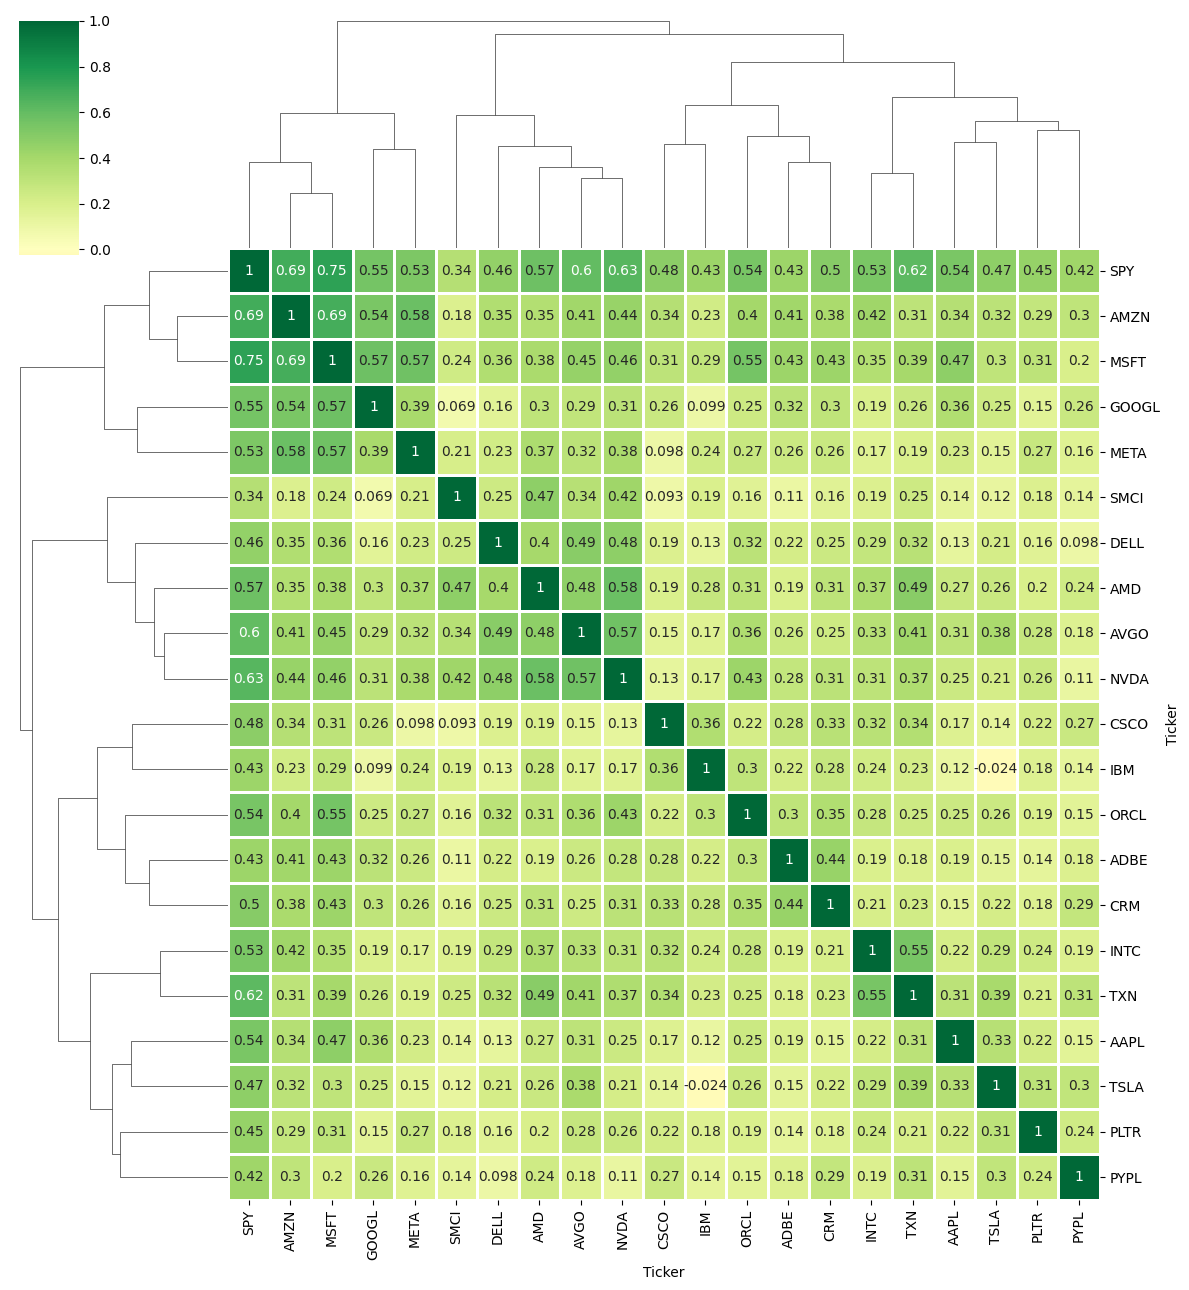

In [40]:
g = sns.clustermap(df_ret.corr(), method='ward', center = 0.0, cmap="RdYlGn",
                   dendrogram_ratio=(.2, .2),
                   linewidths=.75, figsize=(12, 13),
                   annot = True)

In [44]:
group_A = df[['AMZN', 'MSFT', 'SPY']]

In [45]:
group_A_geo_ret = (group_A.pct_change()+1).cumprod()

<Axes: xlabel='Date'>

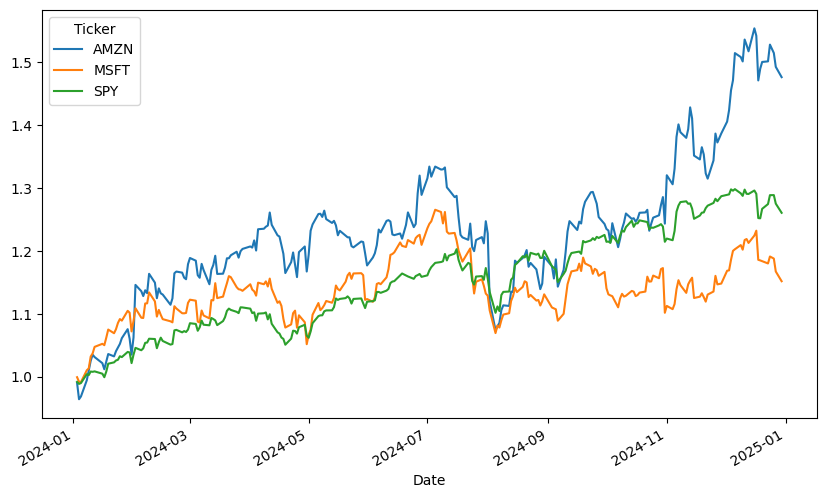

In [46]:
group_A_geo_ret.plot(figsize=(10,6))